# National Address DB to VVI mapping
Writen by Biplab Bhattacharya
Date: 01/16/2024
Description: exploring the US National Address Database, vizient vulnerability index and census tract information

This code connects the National Address Database to the Vizinet Vulnerabiliy Index. In the /data folder, you will need to save the VVI_tract.csv file along with an extract of addresses from the NAD. In this case, the address file is a subset of Pennsylvania addresses saved as "PA_data_100k.csv"

The notebook follows the workflow below
1. Import all requirements Read all inputs from /data folder
2. Iterate over the Latitude and Longitude values in the address dataframe and map them to Census Tract using the censusgeocode API
3. Join the new dataframe with the vvi_tract dataframe on the census tract



In [17]:
#requirements

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
import censusgeocode as cg 
import dask.dataframe as dd

Read all inputs

In [23]:
#Read all input files

##import VVI at tract level

vvi_tract = pd.read_csv("../data/VVI_tract.csv")
#vvi_tract.head()


## PA Addresses
#nad_df = pd.read_csv("../data/NAD.txt")
PA_df = pd.read_csv("../data/PA_data_100k.csv")
#print("PA state data len:", len(PA_df))
#print(PA_df.head())

C:\Users\bbhattacharya\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,5,7,11,12,14,15,17,26,27,38,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
## Define dataframe you want a subset for, required fields are Longitude and Latitude for each address row.
## We use a sample of 10k addresses stored in PA_df_1000

PA_df_1000 = PA_df.iloc[:1000]
print(PA_df_1000.head())

   OID AddNum_Pre  Add_Number AddNum_Suf AddNo_Full St_PreMod St_PreDir  \
0   -1        NaN        1193        NaN       1193       NaN       NaN   
1   -1        NaN          10        NaN         10       NaN     South   
2   -1        NaN         247        NaN        247       NaN       NaN   
3   -1        NaN          54        NaN         54       NaN       NaN   
4   -1        NaN          66        NaN         66       NaN       NaN   

  St_PreTyp  St_PreSep      St_Name  ... Lifecycle Effective Expire  \
0       NaN        NaN  GRANGE HALL  ...       NaN       NaN    NaN   
1       NaN        NaN        GRANT  ...       NaN       NaN    NaN   
2       NaN        NaN        GRANT  ...       NaN       NaN    NaN   
3       NaN        NaN     GRATOSKY  ...       NaN       NaN    NaN   
4       NaN        NaN     GRATOSKY  ...       NaN       NaN    NaN   

   DateUpdate AnomStatus LocatnDesc Addr_Type DeliverTyp  \
0  2020-01-06        NaN        NaN   Unknown        NaN   
1 

Main

In [25]:
#df_PA_sub = PA_df[['Longitude', 'Latitude', 'Addr_Type']]
# This chunk pulls Census tract for each address using Lat and Long from the NAD
for index,row in PA_df_1000.iterrows():
    #print(index, row["Longitude"],row['Latitude'])
    info = cg.coordinates(x=row["Longitude"], y=row["Latitude"])
    id = info['Census Tracts'][0].get('GEOID')
    PA_df_1000.loc[index,"censusTract"] = float(id)

#print(PA_df_1000)

# This is a join statement that adds the VVI information to each address
PA_df_1000 = pd.merge(PA_df_1000,vvi_tract[['censusTract','VVI']],on='censusTract', how='left')

PA_df_1000.head()

c:\Program Files\Python37\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
c:\Program Files\Python37\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,OID,AddNum_Pre,Add_Number,AddNum_Suf,AddNo_Full,St_PreMod,St_PreDir,St_PreTyp,St_PreSep,St_Name,...,Expire,DateUpdate,AnomStatus,LocatnDesc,Addr_Type,DeliverTyp,NAD_Source,DataSet_ID,censusTract,VVI
0,-1,NaN,1193,NaN,1193,NaN,NaN,NaN,NaN,GRANGE HALL,...,NaN,2020-01-06,NaN,NaN,Unknown,NaN,"Indiana County, Pennsylvania",NaN,4.206396e+10,-0.074666
1,-1,NaN,10,NaN,10,NaN,South,NaN,NaN,GRANT,...,NaN,2020-01-06,NaN,NaN,Unknown,NaN,"Indiana County, Pennsylvania",NaN,4.206396e+10,-0.007359
2,-1,NaN,247,NaN,247,NaN,NaN,NaN,NaN,GRANT,...,NaN,2020-01-06,NaN,NaN,Unknown,NaN,"Indiana County, Pennsylvania",NaN,4.206396e+10,-0.144812
3,-1,NaN,54,NaN,54,NaN,NaN,NaN,NaN,GRATOSKY,...,NaN,2020-01-06,NaN,NaN,Unknown,NaN,"Indiana County, Pennsylvania",NaN,4.206396e+10,-0.184075
4,-1,NaN,66,NaN,66,NaN,NaN,NaN,NaN,GRATOSKY,...,NaN,2020-01-06,NaN,NaN,Unknown,NaN,"Indiana County, Pennsylvania",NaN,4.206396e+10,-0.184075


Tests and appendix code

array([<AxesSubplot:title={'center':'CleanEnvironment'}>,
       <AxesSubplot:title={'center':'Economic'}>,
       <AxesSubplot:title={'center':'Education'}>,
       <AxesSubplot:title={'center':'HealthCareAccess'}>,
       <AxesSubplot:title={'center':'Housing'}>,
       <AxesSubplot:title={'center':'Neighborhood'}>,
       <AxesSubplot:title={'center':'PublicSafety'}>,
       <AxesSubplot:title={'center':'Social'}>,
       <AxesSubplot:title={'center':'Transportation'}>,
       <AxesSubplot:title={'center':'VVI'}>], dtype=object)

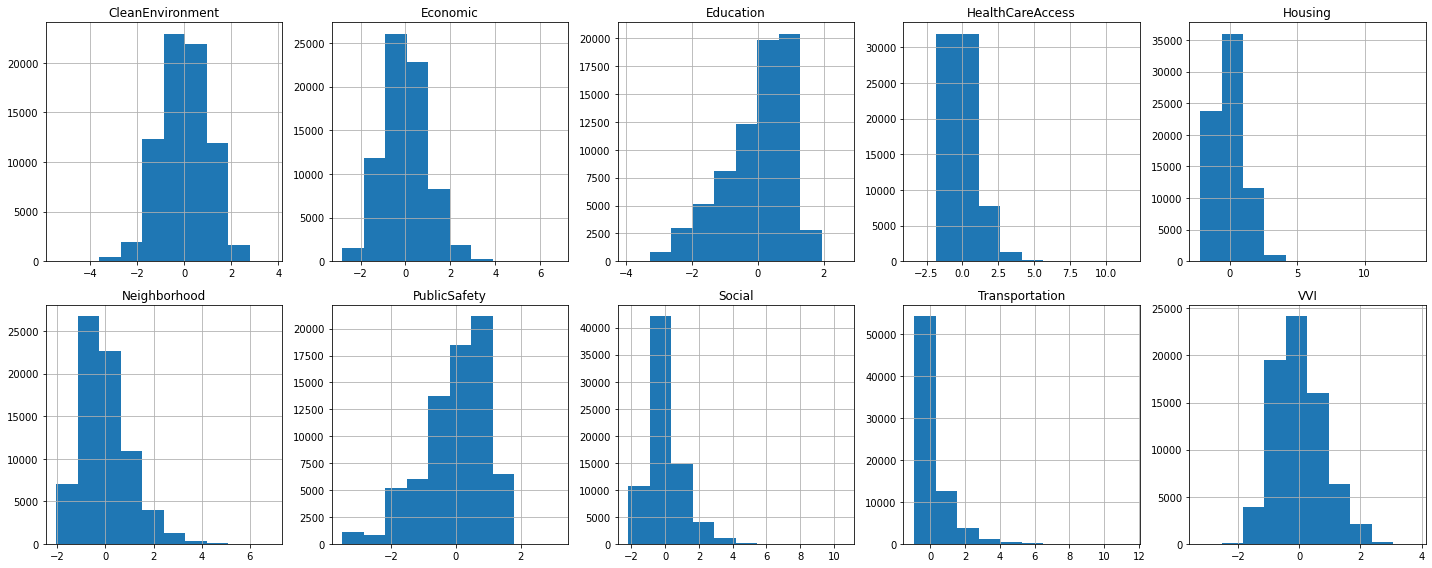

In [ ]:
vvi_tract_vars = vvi_tract.drop('censusTract', axis = 1)
fig, axis = plt.subplots(2, 5, tight_layout=True, figsize = (20,8))
vvi_tract_vars.hist(ax=axis)

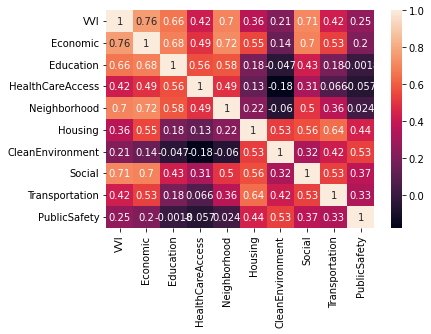

In [ ]:
corr_plot = sb.heatmap(vvi_tract_vars.corr(),annot = True)

In [ ]:
tract_shp = gpd.read_file('../data/cb_2022_us_tract_500k.zip')

pa_tract = tract_shp[tract_shp.STATE_NAME == 'Pennsylvania']
pa_tract.head(5)

pa_tract['fips'] = pa_tract['STATEFP'] + pa_tract['COUNTYFP'] + pa_tract['TRACTCE'] 
pa_tract.head(5)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
800,42,001,031101,1400000US42001031101,42001031101,311.01,Census Tract 311.01,PA,Adams County,Pennsylvania,CT,3042633,0,"POLYGON ((-77.03108 39.80239, -77.02262 39.806..."
805,42,013,100400,1400000US42013100400,42013100400,1004,Census Tract 1004,PA,Blair County,Pennsylvania,CT,993724,0,"POLYGON ((-78.42478 40.50948, -78.41635 40.514..."
806,42,013,100300,1400000US42013100300,42013100300,1003,Census Tract 1003,PA,Blair County,Pennsylvania,CT,1217046,0,"POLYGON ((-78.42339 40.50129, -78.41858 40.504..."
807,42,013,100800,1400000US42013100800,42013100800,1008,Census Tract 1008,PA,Blair County,Pennsylvania,CT,996553,0,"POLYGON ((-78.41067 40.53529, -78.40802 40.537..."
821,42,011,000100,1400000US42011000100,42011000100,1,Census Tract 1,PA,Berks County,Pennsylvania,CT,807871,0,"POLYGON ((-75.93179 40.33537, -75.93170 40.338..."


In [ ]:
pa_tract.explore()

In [ ]:
#testing if I can extract Census tract information from lat and long
#print(nad_df.Latitude[1])
#result = cg.coordinates(x=nad_df.Longitude[1], y=nad_df.Latitude[1])
result = cg.coordinates(x="-76.883484", y="40.965027")
result

In [ ]:
print(pa_tract[pa_tract['fips'] == '42119090700'])

In [ ]:
#res = [d.get('Census Tracts') for d in result]
a = result['Census Tracts'][0].get('GEOID')
print(a)
#a.get('GEOID')


42119090700


In [ ]:
'''
for index,row in df_PA_sub.iterrows():
    print(row["Longitude"],row['Latitude'])
    info = cg.coordinates(x=row["Longitude"], y=row["Latitude"])
    id = info['Census Tracts'][0].get('GEOID')
    print(id)
    df_PA_sub.loc[index,"censusTract"] = float(id)

print(df_PA_sub)


df_PA_sub = pd.merge(df_PA_sub,vvi_tract[['censusTract','VVI']],on='censusTract', how='left')
'''